# Heart Disease UCI" Dataset 
The code implements Particle Swarm Optimization (PSO) for feature selection on the Heart Disease UCI dataset. Here's a breakdown of the key components:

Libraries

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Load the dataset

In [141]:
data = pd.read_csv(r"C:\Users\mrtat\Downloads\Datasets\heart.csv")  
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

In [142]:
data.head(3)  # Display the first 3 rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [143]:
data.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Split the dataset

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Define the objective function

In [ ]:
def objective_function(positions):
    selected_features = positions > 0.5  # Binary mask for feature selection (1 for selected, 0 for not)
    fitness = []
    for i in selected_features:
        if np.sum(i) == 0:  # Avoid empty feature subsets
            fitness.append(0) #if no features are selected, the fitness is set to 0.
            continue
        X_train_selected = X_train[:, i]
        X_test_selected = X_test[:, i]
        
        # Train a simple classifier
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train_selected, y_train)
        y_pred = clf.predict(X_test_selected)
        
        # Use accuracy as the fitness value
        fitness.append(accuracy_score(y_test, y_pred))
    return np.array(fitness)

PSO Parameters

In [ ]:
pop_size = 5  # Number of particles
dims = X_train.shape[1]  # Number of features
c1 = c2 = 1.5  # Cognitive and social coefficients (personal and global best)
w = 0.9  # Inertia weight
num_iterations = 20  # Number of iterations
lower_limit = -5  # Lower bound for positions
upper_limit = 5 # Upper bound for positions

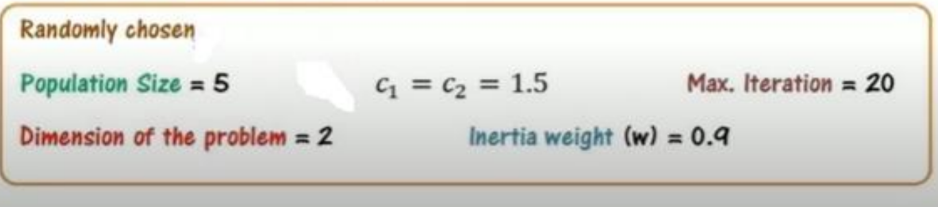

Initialize particles

In [147]:
velocity = np.random.rand(pop_size, dims)
velocity[:3]  # Display the first 10 rows of velocity

array([[0.78408266, 0.3983326 , 0.25612684, 0.2902308 , 0.00782878,
        0.02079156, 0.10219487, 0.68636956, 0.23231669, 0.97596437,
        0.23366492, 0.88177588, 0.31001367],
       [0.50082671, 0.94749299, 0.36567986, 0.92463047, 0.88624324,
        0.70596721, 0.52447806, 0.63051863, 0.44814146, 0.02575453,
        0.79680649, 0.47783209, 0.17235541],
       [0.43519072, 0.20939926, 0.56738824, 0.67127432, 0.58865775,
        0.40581877, 0.55527063, 0.96364442, 0.58261509, 0.26567564,
        0.0209447 , 0.72485832, 0.9668684 ]])

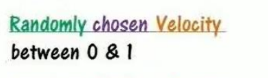

In [148]:
position = lower_limit + np.random.rand(pop_size, dims) * (upper_limit - lower_limit)
fit = objective_function(position)
position[:3]  # Display the first 3 rows of position

array([[ 3.07850041, -2.9630103 , -0.5156877 , -1.28641572,  2.15442776,
         1.7091661 , -0.7990267 , -0.98275098, -3.15927427, -3.32449459,
        -3.11385734,  1.06304086,  2.63142187],
       [ 4.63750713,  3.39299793, -4.26167979,  2.11540543,  2.9373745 ,
        -4.53603159, -3.77047143, -2.20152753,  0.82408192,  0.55644813,
         2.24541699,  4.22914265, -1.73676855],
       [-4.65847396, -4.84824523, -0.15047476,  2.44256676, -1.58084666,
         4.95651003,  2.61094511, -0.6333656 , -4.12723143,  4.95439363,
         2.10554678,  2.44249464, -1.10689134]])

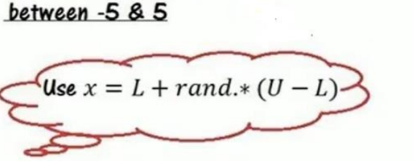

Initialize personal bests and global best

In [ ]:
pbest = position.copy() # Personal best positions
pbest_fitness = fit.copy() # Personal best fitness values
gbest_index = np.argmax(fit) # Global best index
gbest = position[gbest_index] # Global best position
gbest_fitness = fit[gbest_index] # Global best fitness value

PSO Iterations

In [150]:
fitness_over_time = []
for i in range(num_iterations): # Iterate over the number of iterations (20) from 0 to 19
    print(f"Iteration {i}: Best Fitness = {gbest_fitness}")
    
    # Update velocity and position
    velocity = w * velocity \
             + c1 * np.random.rand(pop_size, dims) * (pbest - position) \
             + c2 * np.random.rand(pop_size, dims) * (gbest - position)
     # \ this mean continue in the next line (use mostly for long equations)
    position = position + velocity
    
    # Apply bounds
    position = np.minimum(position, upper_limit)
    position = np.maximum(position, lower_limit)
    
    # Evaluate fitness
    fit = objective_function(position)
    
    # Update personal bests
    for j in range(pop_size):
        if fit[j] > pbest_fitness[j]:
            pbest_fitness[j] = fit[j]
            pbest[j] = position[j].copy()
    
    # Update global best
    current_best_index = np.argmax(fit)
    current_best_fitness = fit[current_best_index]
    if current_best_fitness > gbest_fitness:
        gbest_fitness = current_best_fitness
        gbest = position[current_best_index].copy()
    
    # Track fitness over time
    fitness_over_time.append(gbest_fitness)

Iteration 0: Best Fitness = 0.7868852459016393
Iteration 1: Best Fitness = 0.8524590163934426
Iteration 2: Best Fitness = 0.8524590163934426
Iteration 3: Best Fitness = 0.8852459016393442
Iteration 4: Best Fitness = 0.8852459016393442
Iteration 5: Best Fitness = 0.8852459016393442
Iteration 6: Best Fitness = 0.8852459016393442
Iteration 7: Best Fitness = 0.9016393442622951
Iteration 8: Best Fitness = 0.9016393442622951
Iteration 9: Best Fitness = 0.9180327868852459
Iteration 10: Best Fitness = 0.9180327868852459
Iteration 11: Best Fitness = 0.9180327868852459
Iteration 12: Best Fitness = 0.9180327868852459
Iteration 13: Best Fitness = 0.9180327868852459
Iteration 14: Best Fitness = 0.9180327868852459
Iteration 15: Best Fitness = 0.9180327868852459
Iteration 16: Best Fitness = 0.9180327868852459
Iteration 17: Best Fitness = 0.9180327868852459
Iteration 18: Best Fitness = 0.9180327868852459
Iteration 19: Best Fitness = 0.9180327868852459


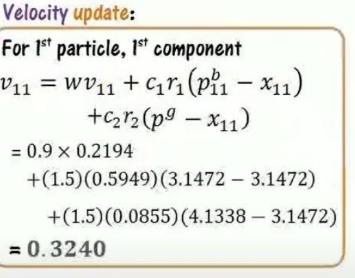


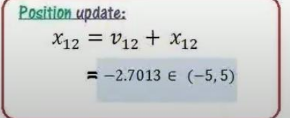 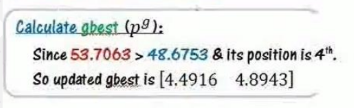 

Plot fitness over iterations

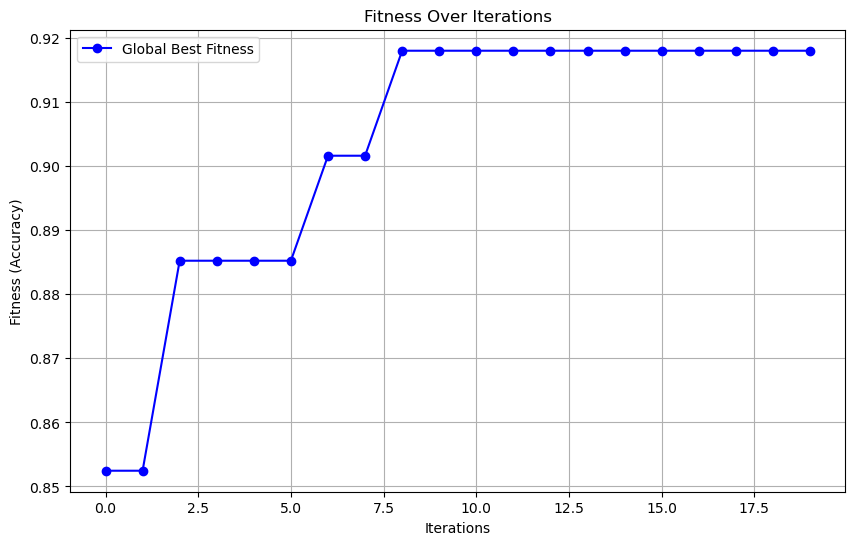

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), fitness_over_time, marker='o', color='b', label='Global Best Fitness')
plt.xlabel('Iterations')
plt.ylabel('Fitness (Accuracy)')
plt.title('Fitness Over Iterations')
plt.grid()
plt.legend()
plt.show()

Selected features visualization

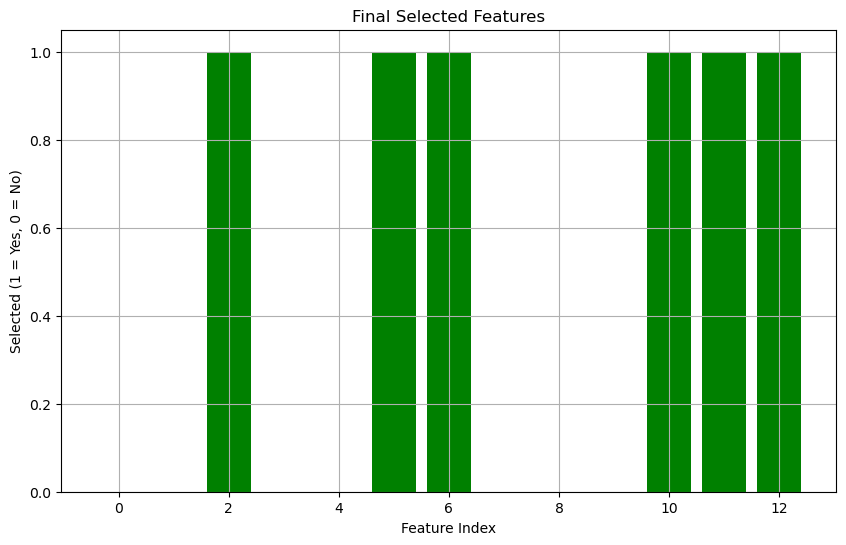

In [164]:
selected_features = gbest > 0.5
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), selected_features, color='green')
plt.xlabel('Feature Index')
plt.ylabel('Selected (1 = Yes, 0 = No)')
plt.title('Final Selected Features')
plt.grid()
plt.show()

Print the best feature subset

In [ ]:
selected_features = gbest > 0.5 # Selected features is boolean array (True/False), mentioned in the objective function
SelectedFeatures=np.where(selected_features)[0]# Convert boolean array to indices of selected features
print(f"Selected Features:{SelectedFeatures}")
print(f"Best Fitness (Accuracy):{gbest_fitness}")

Selected Features: [ 2  5  6 10 11 12]
Best Fitness (Accuracy):0.9180327868852459


The End  ♥